Note that in order to function this notebookk requires access to the correlation matrix, as calculated in a separate file. This correlation matrix is loaded as a numpy array from a CSV file called correlation_matrix_.csv. 

In [1]:
# Installing necessary libraries

!pip install cellpylib

In [2]:
# Importing necessary libraries

import cellpylib as cpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor
import seaborn as sns

array([[100.  ,  87.6 ,  87.56, ...,   0.  ,   0.  ,   0.  ],
       [ 87.6 ,  77.25,  78.1 , ...,  12.55,  11.91,  11.24],
       [ 87.56,  78.1 ,  78.51, ...,  12.6 ,  12.25,  12.61],
       ...,
       [  0.  ,  12.55,  12.6 , ..., 100.  , 100.  , 100.  ],
       [  0.  ,  11.91,  12.25, ..., 100.  , 100.  , 100.  ],
       [  0.  ,  11.24,  12.61, ..., 100.  , 100.  , 100.  ]])

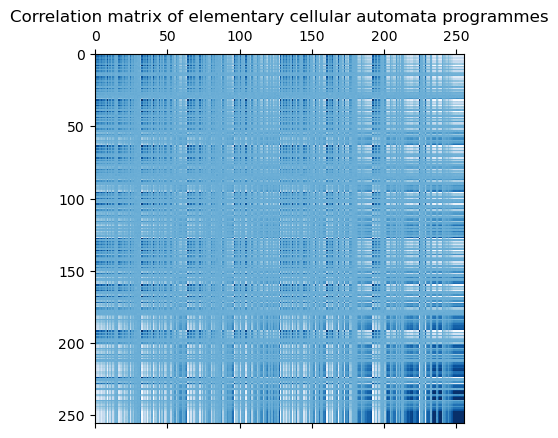

In [7]:
# using loadtxt()
correlation_matrix = np.loadtxt("correlation_matrix_.csv",
                 delimiter=",", dtype=float)
display(correlation_matrix)
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,20)
#plt.rcParams.update({'font.size': 22})
plt.title('Correlation matrix of elementary cellular automata programmes')
ax.matshow(correlation_matrix, cmap=plt.cm.Blues)

In [16]:
diagonal_values = np.diagonal(correlation_matrix)
sorted_indices = np.argsort(diagonal_values)[::-1]
#print(diagonal_values)
sorted_rows = []
for index in sorted_indices:
    sorted_rows.append(correlation_matrix[index])

sorted_indices_list = sorted_indices.tolist()
sorted_indices_str = ', '.join(str(index) for index in sorted_indices_list)

print(sorted_indices_str)

255, 238, 8, 32, 40, 64, 96, 254, 128, 136, 160, 168, 192, 224, 234, 235, 0, 239, 248, 249, 253, 250, 251, 252, 36, 219, 104, 233, 218, 164, 172, 2, 16, 237, 191, 4, 228, 127, 72, 247, 223, 216, 202, 1, 132, 130, 100, 190, 246, 44, 222, 217, 203, 144, 231, 188, 230, 66, 194, 152, 24, 189, 20, 215, 159, 6, 80, 17, 48, 175, 140, 220, 34, 119, 207, 12, 206, 95, 196, 221, 245, 3, 243, 68, 63, 10, 146, 187, 183, 182, 18, 5, 148, 158, 211, 134, 52, 214, 38, 155, 33, 88, 108, 123, 229, 186, 162, 201, 74, 173, 242, 37, 176, 49, 59, 41, 151, 22, 236, 82, 35, 115, 114, 167, 121, 58, 56, 139, 118, 138, 21, 111, 31, 84, 163, 112, 131, 208, 62, 46, 107, 116, 244, 145, 171, 19, 91, 9, 200, 7, 87, 205, 181, 177, 174, 133, 99, 26, 97, 227, 98, 209, 76, 185, 124, 42, 65, 241, 184, 198, 126, 13, 93, 81, 212, 67, 23, 141, 125, 178, 55, 57, 106, 28, 110, 154, 92, 75, 25, 150, 225, 86, 29, 61, 94, 157, 117, 210, 50, 45, 39, 193, 169, 147, 120, 153, 89, 78, 156, 137, 15, 161, 73, 70, 103, 43, 204, 11, 122, 

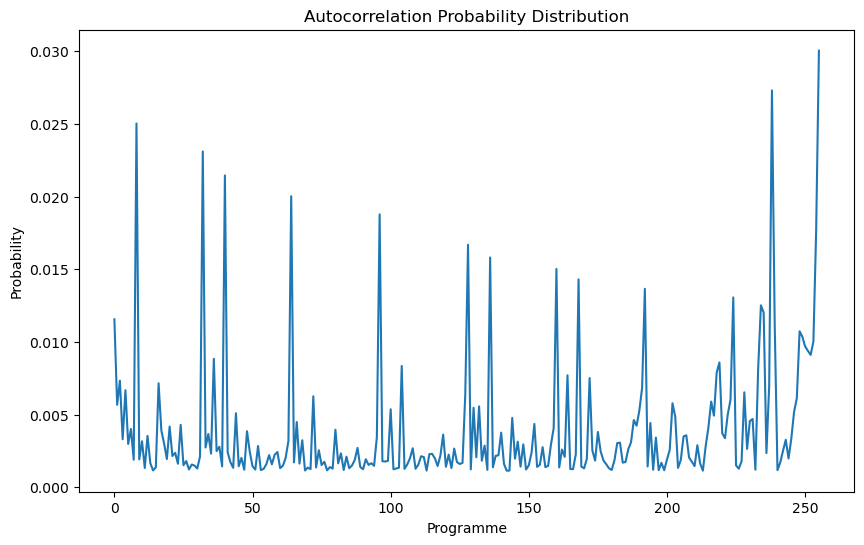

In [27]:
autocorr_order = [255, 238, 8, 32, 40, 64, 96, 254, 128, 136, 160, 168, 192, 224, 234, 235, 0, 239, 248, 249, 253, 250, 251, 252, 36, 219, 104, 233, 218, 164, 172, 2, 16, 237, 191, 4, 228, 127, 72, 247, 223, 216, 202, 1, 132, 130, 100, 190, 246, 44, 222, 217, 203, 144, 231, 188, 230, 66, 194, 152, 24, 189, 20, 215, 159, 6, 80, 17, 48, 175, 140, 220, 34, 119, 207, 12, 206, 95, 196, 221, 245, 3, 243, 68, 63, 10, 146, 187, 183, 182, 18, 5, 148, 158, 211, 134, 52, 214, 38, 155, 33, 88, 108, 123, 229, 186, 162, 201, 74, 173, 242, 37, 176, 49, 59, 41, 151, 22, 236, 82, 35, 115, 114, 167, 121, 58, 56, 139, 118, 138, 21, 111, 31, 84, 163, 112, 131, 208, 62, 46, 107, 116, 244, 145, 171, 19, 91, 9, 200, 7, 87, 205, 181, 177, 174, 133, 99, 26, 97, 227, 98, 209, 76, 185, 124, 42, 65, 241, 184, 198, 126, 13, 93, 81, 212, 67, 23, 141, 125, 178, 55, 57, 106, 28, 110, 154, 92, 75, 25, 150, 225, 86, 29, 61, 94, 157, 117, 210, 50, 45, 39, 193, 169, 147, 120, 153, 89, 78, 156, 137, 15, 161, 73, 70, 103, 43, 204, 11, 122, 60, 85, 179, 170, 102, 30, 79, 226, 109, 105, 54, 165, 71, 166, 90, 101, 129, 27, 149, 51, 232, 47, 195, 135, 180, 83, 53, 240, 197, 199, 77, 14, 69, 143, 113, 213, 142]
programmes_prob_distribution = []
for i in range(256):
    zipf_weight = (autocorr_order.index(i) + 10)**(-1)
    programmes_prob_distribution.append(zipf_weight)
prog_prob_dist_norm = [x / sum(programmes_prob_distribution) for x in programmes_prob_distribution]
programmes_considered = np.arange(0, 256, 1)
plt.figure(figsize=(10,6))
plt.plot(programmes_considered, prog_prob_dist_norm)
plt.xlabel('Programme')
plt.ylabel('Probability')
plt.title('Autocorrelation Probability Distribution')
plt.savefig('Figure - Autocorrelation Probability Distribution.png')
plt.show()